# Exploratory Data Analysis

In [213]:
# Importar las librerias o paquetes que necesitemos
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [214]:
data = pd.read_csv("data.csv")
print(data.shape)
data.head(1)

(4478, 50)


,Power,Current,V1,V2,V3,V4,V5,V6,V7,V8,...,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
0,9751.855054,23.194664,26.98123,26.98123,26.973406,26.98123,26.98123,26.98123,26.98123,26.98123,...,25.923836,25.923836,25.916177,25.923836,25.923836,25.923836,25.923836,25.916177,25.923836,25.923836


In [215]:
data.columns

Index(['Power', 'Current', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48'],
      dtype='object')

In [216]:
dataset.describe()

,Power,Current,V1,V2,V3,V4,V5,V6,V7,V8,...,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
count,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,...,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000
mean,8548.406364,20.332333,27.282597,27.278594,25.165644,26.546133,25.687662,26.549820,26.551080,26.548153,...,27.016855,27.009036,24.514436,26.116681,26.118335,26.117822,26.109303,21.570718,25.002046,24.999461
std,1241.973983,2.954027,1.730856,1.732026,7.097594,4.172596,6.216940,4.172182,4.172041,4.172369,...,1.872372,1.874603,7.652630,4.656072,4.655903,4.655956,4.656826,16.794012,6.522964,6.523113
min,6170.875545,14.680317,26.443160,26.438760,-0.813498,1.068002,-0.806746,1.072335,1.073729,1.070376,...,25.916403,25.916403,-0.813200,0.002294,0.004140,0.003586,-0.006293,-74.068320,0.001106,-0.001801
25%,9009.302242,21.430247,26.582026,26.577610,26.557545,26.565811,26.558579,26.569769,26.571122,26.567980,...,26.122920,26.114228,26.102953,26.112811,26.114589,26.114037,26.104871,26.102889,26.106987,26.104294
50%,9049.929132,21.524673,26.617965,26.613553,26.594093,26.601683,26.594880,26.605639,26.606991,26.603850,...,26.147950,26.139264,26.130206,26.138316,26.140097,26.139544,26.130370,26.131185,26.133572,26.130881
75%,9357.425934,22.256786,26.667098,26.662693,26.634446,26.647068,26.637195,26.651030,26.652384,26.649238,...,27.974363,27.966564,26.162413,26.182836,26.184616,26.184063,26.174896,26.160138,26.168364,26.165677
max,9751.855054,23.194664,32.894773,32.894773,32.894773,32.894773,32.894773,32.894773,32.894773,32.894773,...,32.823579,32.823579,32.819617,32.819617,32.819617,32.819617,32.819617,28.106440,32.819617,32.819617


# Find Max number of Clusters

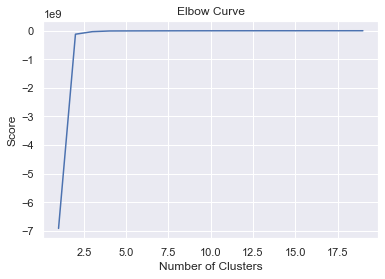

In [217]:
Nc = range( 1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# K-Means Algorithm

In [224]:
kmeans = KMeans(n_clusters =5).fit(data)
centroids = kmeans.cluster_centers_

Text(0.5, 0.92, '5 Clusters')

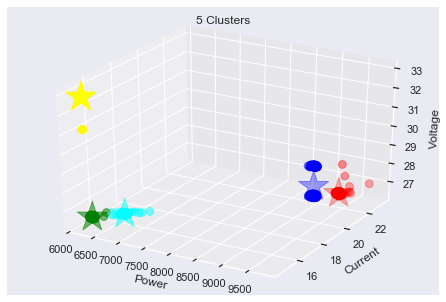

In [226]:
labels = kmeans.predict(data)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)


ax.set_xlabel('Power')
ax.set_ylabel('Current')
ax.set_zlabel('Voltage')
ax.set_title('5 Clusters')